In [1]:
from mma import *
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from numpy.polynomial.polynomial import polyfit
from pandas import read_csv
from gudhi.point_cloud.timedelay import TimeDelayEmbedding
from tqdm import tqdm
from benchmark_functions import *

In [2]:
def get_dataset(dataset = "Coffee"):
    dataset_path = "./UCR/" + dataset + "/" + dataset + "_TRAIN.tsv"
    data = np.array(read_csv(dataset_path, delimiter='\t', header=None, index_col=0))
    return data
data = get_dataset("Coffee")

In [3]:
tde = TimeDelayEmbedding().transform(data)[0]
len(tde)

284

In [4]:
np.min(tde),np.max(tde),np.mean(tde), np.std(tde)

(-1.9360067, 1.8022991, 0.00860293417523468, 0.9946588683077072)

In [5]:
# Creates the simplextree with an alpha complex
simplextree = gd.AlphaComplex(points=tde).create_simplex_tree(max_alpha_square=16) # diameter is 4
print(simplextree.num_simplices(), simplextree.dimension())

# Creates the density filtration via kernel density estimation
complex_filtration = np.array([simplextree.filtration(s) for s,_ in simplextree.get_simplices()])
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(tde)
density_filtration = -np.array(kde.score_samples(tde))

# Creates the boundary compatible with the filtration
boundary, filtration = ls_boundary_density(simplextree, [complex_filtration, density_filtration], [0])

5945 3


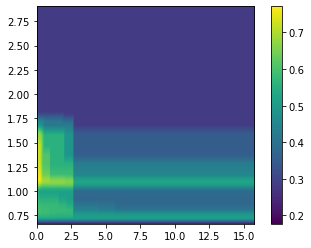

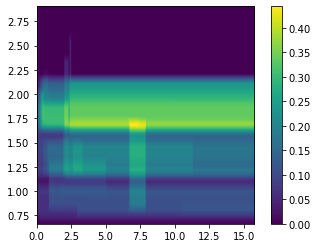

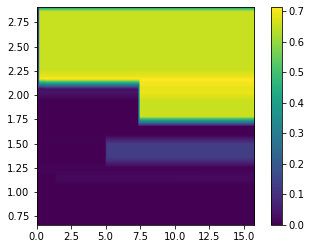

100%|█████████████████████████████████████████| 200/200 [06:53<00:00,  2.07s/it]


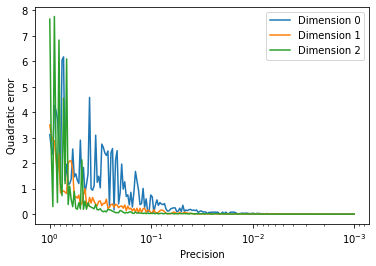

In [6]:
convergence_image(boundary, filtration, 0.001,0.05, num=200,save="UCR_Coffee_0_");